# Storing each 50ms row as a seperate spectrum
50 ms row = 1102 samples
13 rows = 650ms

In [1]:
import numpy as np
import librosa
import librosa.display
from scipy.io import wavfile
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Loading Sounds

In [9]:
names = {'Ba.wav', 'fa.wav', 'Ga.wav', 'Ma.wav', 'Ra.wav', 'Bu.wav', 'Ru.wav', 'mu.wav', 'fu.wav', 'Gu.wav'}
path = '/home/srg/Documents/MSU/EEG/data/sound_files/'
SR = 22050

Sounds = []
for name in names:
    Sounds.append(librosa.load(path + name, sr=SR)[0])

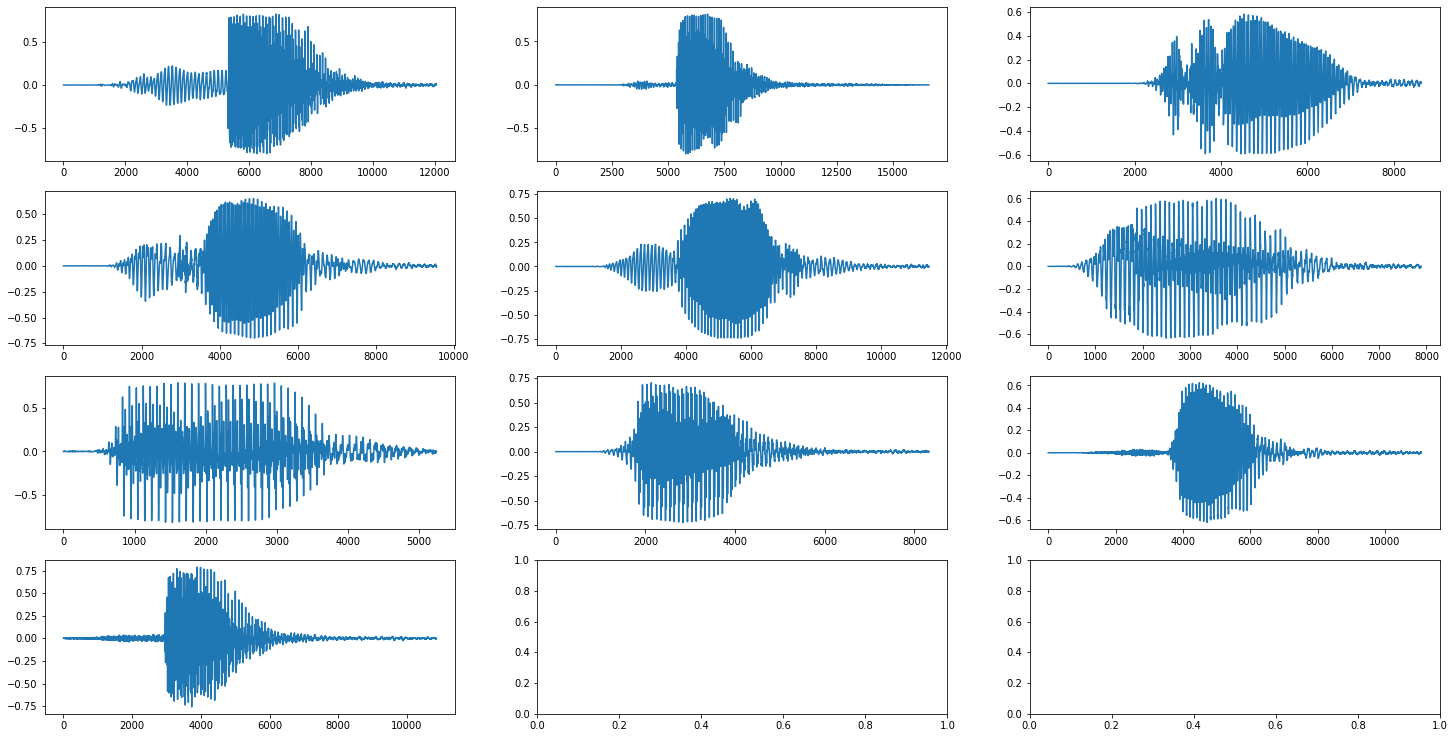

In [13]:
fig, axes = plt.subplots(figsize=(25, 13), nrows=4, ncols=3)
for i in range(4):
    for j in range(3):
        axes[i][j].plot(Sounds[3 * i + j])
        if 3 * i + j == 9:
            break

### Reshaping to 650 ms

In [ ]:
Snd = np.empty((0, 14326))
for sig in Sounds:
    if sig.shape[0] <= 14326:
        tmp = np.pad(sig, ((14326 - sig.shape[0]) // 2,
                           (14326 - sig.shape[0]) // 2), 'constant', constant_values=(0, 0))
        Snd = np.append(Snd, tmp.reshape(1, -1), axis=0)
    else:
        Snd = np.append(Snd, sig[:14326].reshape(1, -1))
#Snd = Snd.reshape(10, 13, 1102)
Snd.shape